In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Pandasdata\\DT_files\\temperature.csv",parse_dates=["Date"])

In [3]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
# the task is to correct the bias in next days temperature predictions. That means we have to predict Tmax, Tmin and compare with the 
# original and then make corrections acordingly

df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

In [5]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [6]:
df['station'].value_counts()

25.0    310
12.0    310
2.0     310
3.0     310
4.0     310
5.0     310
6.0     310
7.0     310
8.0     310
9.0     310
10.0    310
11.0    310
13.0    310
23.0    310
14.0    310
15.0    310
16.0    310
18.0    310
20.0    310
22.0    310
24.0    310
17.0    310
19.0    310
21.0    310
1.0     310
Name: station, dtype: int64

In [7]:
df.shape

(7752, 25)

In [8]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaT,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaT,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [9]:
# last two rows were very different with> 100% humidity. This is an outlier we can eliminate this.
# we can eliminate the null value rows as the date is <1% of the remaining

df=df.dropna()


In [10]:
df.shape

(7588, 25)

In [11]:
df.reset_index()

,index,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7583,7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7584,7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7585,7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7586,7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [12]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [13]:
# let us split the date in to day, weekday, month
df['Date'].value_counts()

2013-08-19    25
2013-08-27    25
2015-07-13    25
2014-08-09    25
2017-07-15    25
              ..
2015-08-13    22
2017-07-06    22
2017-08-23    22
2015-07-24    22
2017-06-30    16
Name: Date, Length: 307, dtype: int64

In [14]:
df['Weekday'] = df['Date'].dt.day_name()

In [15]:
df['Day']=df.Date.dt.day

In [16]:
df['Year']=df['Date'].dt.year

In [17]:
df['Month']=df['Date'].dt.month

In [18]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Weekday,Day,Year,Month
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,126.991,212.3350,2.7850,5992.895996,29.1,21.2,Sunday,30,2013,6
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,127.032,44.7624,0.5141,5869.312500,30.5,22.5,Sunday,30,2013,6
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,127.058,33.3068,0.2661,5863.555664,31.1,23.9,Sunday,30,2013,6
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,127.022,45.7160,2.5348,5856.964844,31.7,24.3,Sunday,30,2013,6
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,127.135,35.0380,0.5055,5859.552246,31.2,22.5,Sunday,30,2013,6


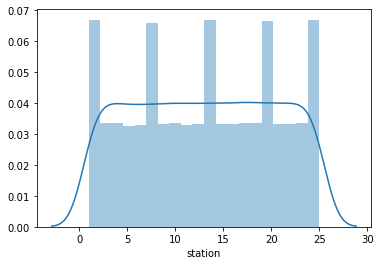

In [19]:
# let us plot graphs to understand the distribution of data
sns.distplot(df['station'])

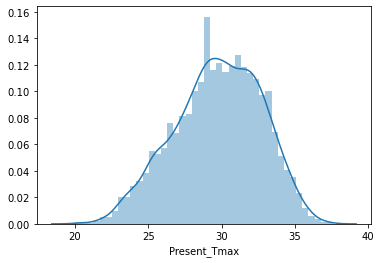

In [20]:
sns.distplot(df['Present_Tmax'])

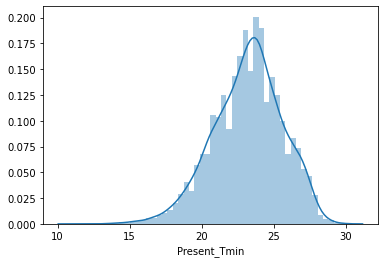

In [21]:
sns.distplot(df['Present_Tmin'])

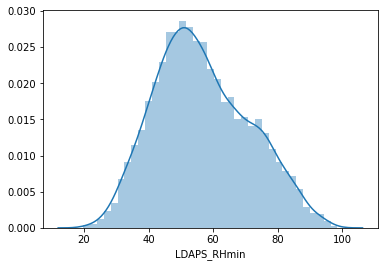

In [22]:
sns.distplot(df['LDAPS_RHmin'])

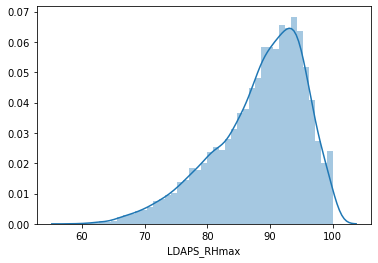

In [23]:
sns.distplot(df['LDAPS_RHmax'])

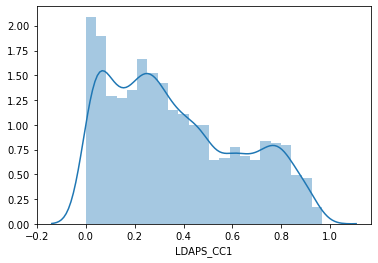

In [24]:
sns.distplot(df['LDAPS_CC1'])

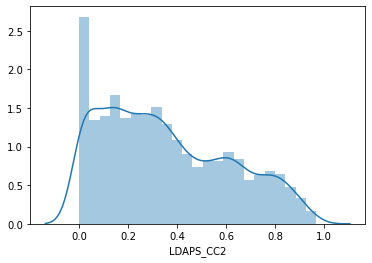

In [25]:
sns.distplot(df['LDAPS_CC2'])

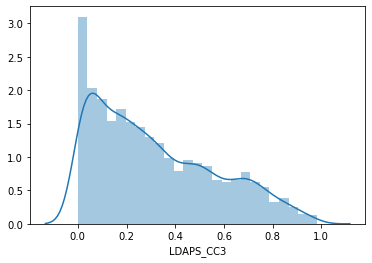

In [26]:
sns.distplot(df['LDAPS_CC3'])

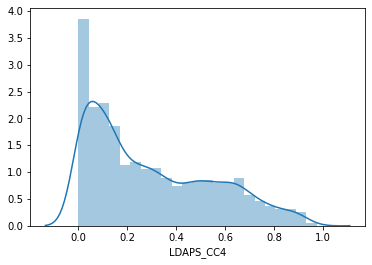

In [27]:
sns.distplot(df['LDAPS_CC4'])

In [28]:
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
Weekday                     object
Day                          int64
Year                         int64
Month               

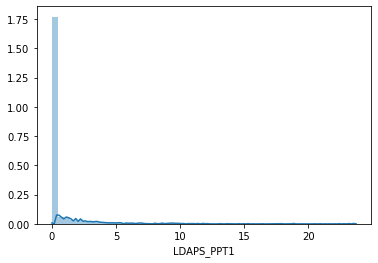

In [29]:
sns.distplot(df['LDAPS_PPT1'])

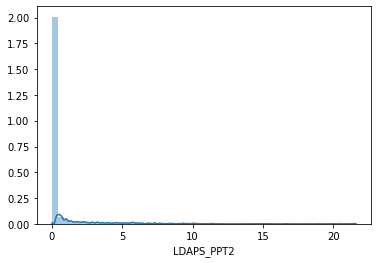

In [30]:
sns.distplot(df['LDAPS_PPT2'])

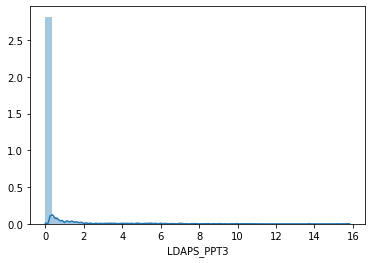

In [31]:
sns.distplot(df['LDAPS_PPT3'])

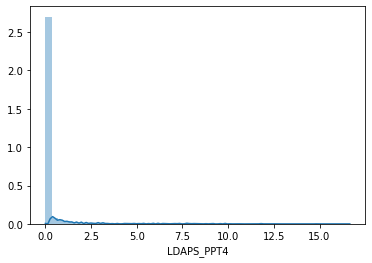

In [32]:
sns.distplot(df['LDAPS_PPT4'])

In [33]:
# many outliers in precipitation

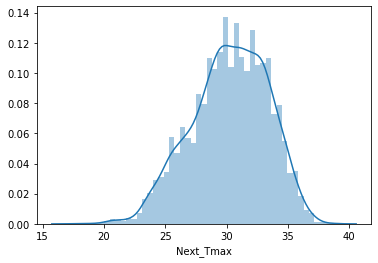

In [34]:
sns.distplot(df['Next_Tmax'])

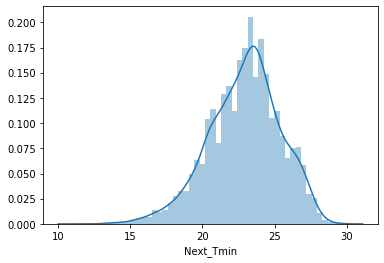

In [35]:
sns.distplot(df['Next_Tmin'])

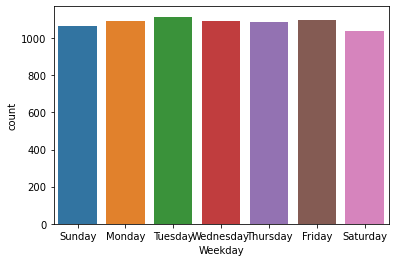

In [36]:
sns.countplot(x='Weekday',data=df)

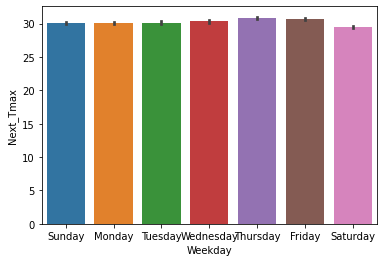

In [37]:
sns.barplot(x='Weekday',y='Next_Tmax',data=df)

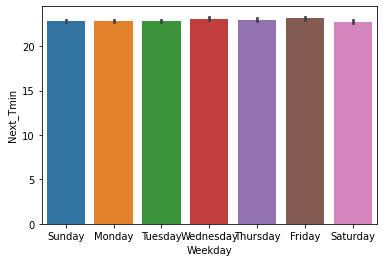

In [38]:
sns.barplot(x='Weekday',y='Next_Tmin',data=df)

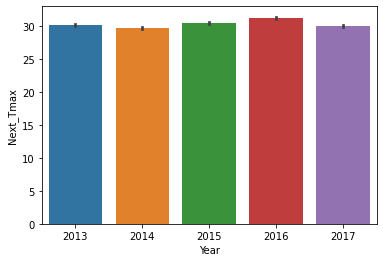

In [39]:
sns.barplot(x='Year',y='Next_Tmax',data=df)

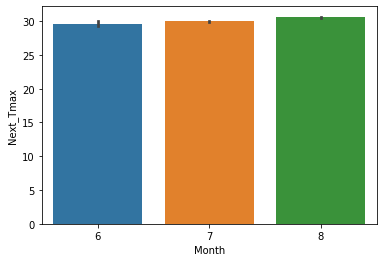

In [40]:
sns.barplot(x='Month',y='Next_Tmax',data=df)

In [41]:
# almost equal in all months and days

In [42]:
# we will drop latitude and longitude
df.drop('lat',axis=1,inplace=True)
df.drop('lon',axis=1,inplace=True)

In [43]:
df_corr= df.corr()

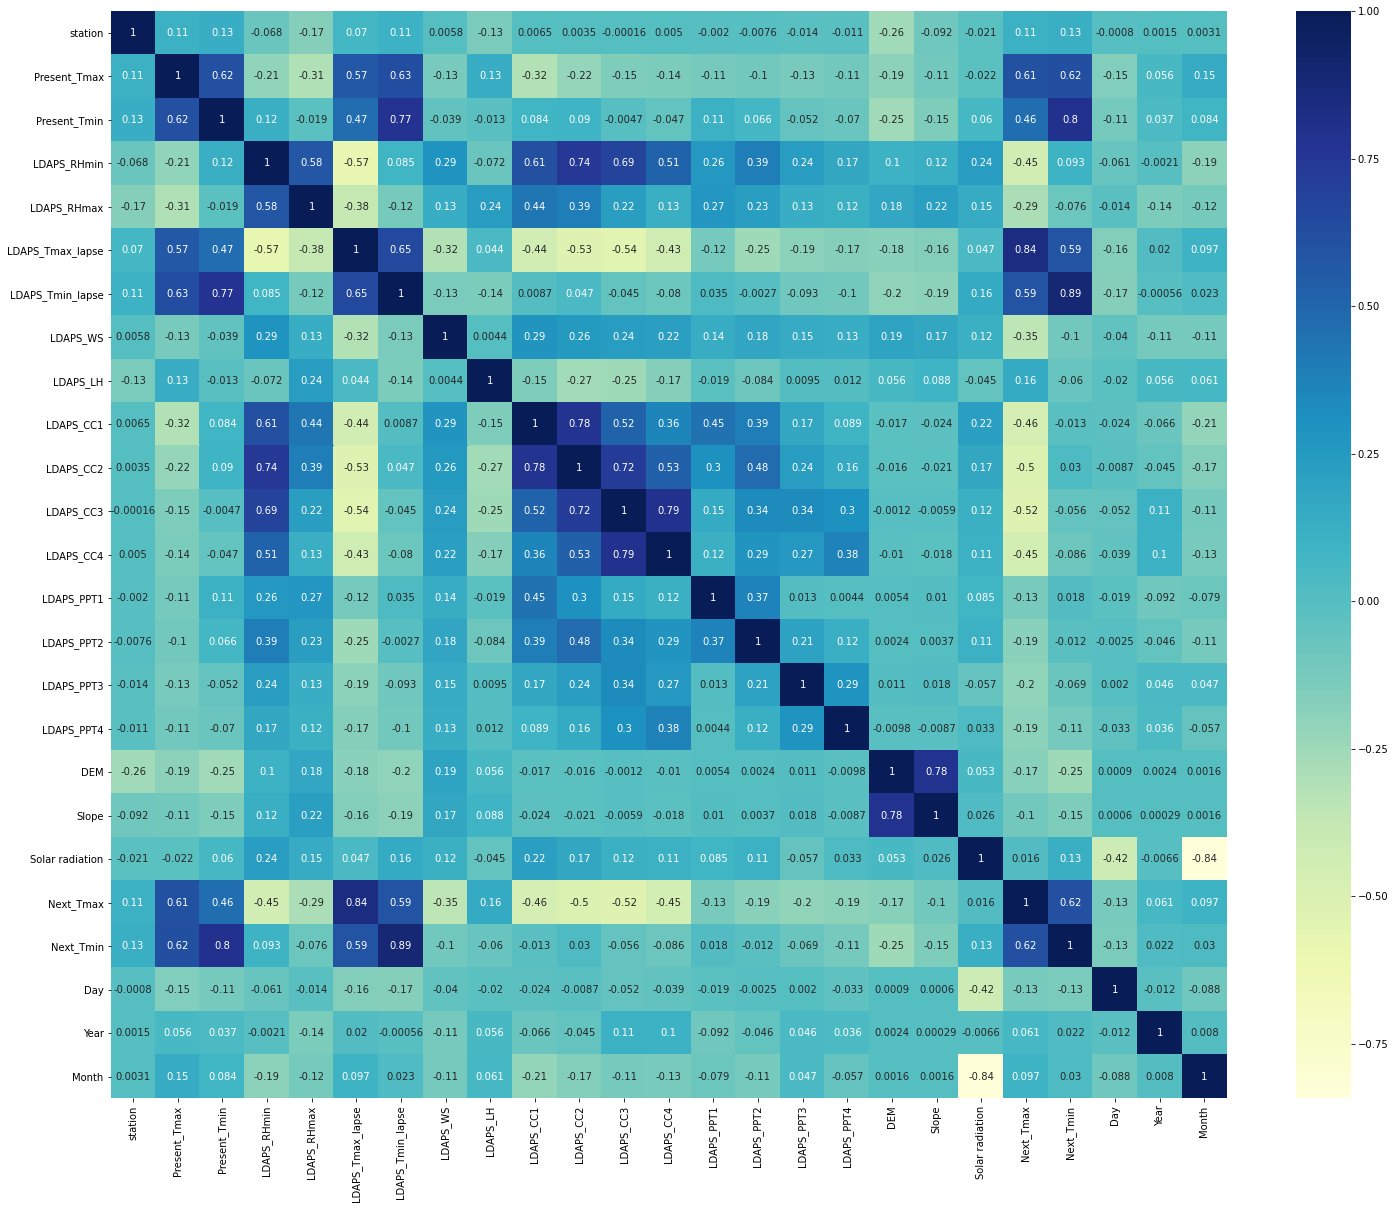

In [44]:
plt.figure(figsize=(25,20))
sns.heatmap(df_corr,cmap='YlGnBu',annot=True)

In [45]:
df_cut=df.drop(['Date','Year','Month','Weekday','Day'],axis=1)

In [46]:
df_cut

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.130928,0.0,0.0,0.0,0.0,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.127727,0.0,0.0,0.0,0.0,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.142125,0.0,0.0,0.0,0.0,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.134249,0.0,0.0,0.0,0.0,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.170021,0.0,0.0,0.0,0.0,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.004380,0.0,0.0,0.0,0.0,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.017678,0.0,0.0,0.0,0.0,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.000000,0.0,0.0,0.0,0.0,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.000000,0.0,0.0,0.0,0.0,17.2956,0.2223,4438.373535,28.6,18.8


In [47]:
df_cut_tmin=df_cut.drop('Next_Tmin',axis=1)

In [48]:
x=df_cut_tmin.drop('Next_Tmax',axis=1)

In [49]:
y=df_cut_tmin['Next_Tmax']

In [50]:
x.shape,y.shape

((7588, 20), (7588,))

In [51]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x= ss.fit_transform(x)

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
def max_r2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [53]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
max_r2_score(dtr,x,y)

r2 score corresponding to  42  is  0.7540920229321603
r2 score corresponding to  43  is  0.7964431053529712
r2 score corresponding to  44  is  0.7804954927285256
r2 score corresponding to  45  is  0.7878434312068816
r2 score corresponding to  46  is  0.7832496364538246
r2 score corresponding to  47  is  0.7830653200017831
r2 score corresponding to  48  is  0.7904373292864627
r2 score corresponding to  49  is  0.7646133566291212
r2 score corresponding to  50  is  0.8000757737816591
r2 score corresponding to  51  is  0.764211747808117
r2 score corresponding to  52  is  0.7784614024061149
r2 score corresponding to  53  is  0.7802598815490315
r2 score corresponding to  54  is  0.7752075858990167
r2 score corresponding to  55  is  0.7699605626759949
r2 score corresponding to  56  is  0.7880501713191422
r2 score corresponding to  57  is  0.7656268884998071
r2 score corresponding to  58  is  0.7683159030530549
r2 score corresponding to  59  is  0.798241704836774
r2 score corresponding to  60 

75

In [54]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=500)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=48,test_size=0.2)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("R2 Score=", r2_score(y_test,y_pred))

R2 Score= 0.9071406364712559


In [55]:
pip install bias-correction

In [56]:
from bias_correction import BiasCorrection

In [57]:
reference=df_cut['Next_Tmax']
model=y_pred
data_correct=df_cut['Next_Tmax']

In [58]:
bc=BiasCorrection(reference,model,data_correct)

In [59]:
corrected = bc.correct(method='gamma_mapping')

In [60]:
corrected

0       29.030940
1       30.562920
2       31.218752
3       31.800642
4       31.241095
          ...    
7745    27.605340
7746    27.953804
7747    28.267617
7748    28.497107
7749    27.785066
Length: 7588, dtype: float64

In [61]:
y_pred

array([27.3874, 31.6244, 26.2842, ..., 31.2794, 27.1628, 28.776 ])

In [62]:
reference

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 7588, dtype: float64

In [63]:
df_cut['Corrected_Tmax']=corrected

In [64]:
df['Corrected_Tmax']=corrected

In [65]:
df_cut.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Corrected_Tmax
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,0.0,212.3350,2.7850,5992.895996,29.1,21.2,29.030940
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,0.0,44.7624,0.5141,5869.312500,30.5,22.5,30.562920
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,0.0,33.3068,0.2661,5863.555664,31.1,23.9,31.218752
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,0.0,45.7160,2.5348,5856.964844,31.7,24.3,31.800642
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,0.0,35.0380,0.5055,5859.552246,31.2,22.5,31.241095


In [66]:
# here we have corrected the bias in Tmax using predicted value. In the same way we do it for Tmin
# model efficiency can be improved by using other algorithms aswell (further study). 

In [67]:
df_cut

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Corrected_Tmax
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,0.0,212.3350,2.7850,5992.895996,29.1,21.2,29.030940
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,0.0,44.7624,0.5141,5869.312500,30.5,22.5,30.562920
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,0.0,33.3068,0.2661,5863.555664,31.1,23.9,31.218752
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,0.0,45.7160,2.5348,5856.964844,31.7,24.3,31.800642
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,0.0,35.0380,0.5055,5859.552246,31.2,22.5,31.241095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.0,0.0,0.0,0.0,26.2980,0.5721,4456.024414,27.6,17.7,27.605340
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.0,0.0,0.0,0.0,21.9668,0.1332,4441.803711,28.0,17.1,27.953804
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.0,0.0,0.0,0.0,15.5876,0.1554,4443.313965,28.3,18.1,28.267617
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.0,0.0,0.0,0.0,17.2956,0.2223,4438.373535,28.6,18.8,28.497107


In [68]:
df_cut_tmin=df_cut.drop(['Next_Tmax','Corrected_Tmax'],axis=1)

In [69]:
x=df_cut_tmin.drop('Next_Tmin',axis=1)
y=df_cut_tmin['Next_Tmin']

In [70]:
x.shape,y.shape

((7588, 20), (7588,))

In [71]:
x= ss.fit_transform(x)

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
def max_r2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [73]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
max_r2_score(lr,x,y)

r2 score corresponding to  42  is  0.8324961558737259
r2 score corresponding to  43  is  0.842832952897883
r2 score corresponding to  44  is  0.8192526905953365
r2 score corresponding to  45  is  0.8425048091769249
r2 score corresponding to  46  is  0.8271113144478953
r2 score corresponding to  47  is  0.8346944264338251
r2 score corresponding to  48  is  0.8437392227427262
r2 score corresponding to  49  is  0.8388715047428291
r2 score corresponding to  50  is  0.8270513275405558
r2 score corresponding to  51  is  0.8440742743289233
r2 score corresponding to  52  is  0.8334566806368838
r2 score corresponding to  53  is  0.8341520330283876
r2 score corresponding to  54  is  0.842466151170981
r2 score corresponding to  55  is  0.835715366975564
r2 score corresponding to  56  is  0.8397825843910336
r2 score corresponding to  57  is  0.8232485515866549
r2 score corresponding to  58  is  0.8324255063476392
r2 score corresponding to  59  is  0.8212344516060793
r2 score corresponding to  60  

60

In [74]:
max_r2_score(dtr,x,y)

r2 score corresponding to  42  is  0.8006863455293931
r2 score corresponding to  43  is  0.7916080140720054
r2 score corresponding to  44  is  0.7791193415917516
r2 score corresponding to  45  is  0.7960112554348215
r2 score corresponding to  46  is  0.795396232170406
r2 score corresponding to  47  is  0.7844633554532909
r2 score corresponding to  48  is  0.7777279701286582
r2 score corresponding to  49  is  0.7753834536107193
r2 score corresponding to  50  is  0.7635628261471433
r2 score corresponding to  51  is  0.7824569316460244
r2 score corresponding to  52  is  0.7840172602273972
r2 score corresponding to  53  is  0.7966082990156311
r2 score corresponding to  54  is  0.7927250094440539
r2 score corresponding to  55  is  0.7943869025491983
r2 score corresponding to  56  is  0.7968569382389185
r2 score corresponding to  57  is  0.7727057551148719
r2 score corresponding to  58  is  0.7888901893522856
r2 score corresponding to  59  is  0.7751100465457619
r2 score corresponding to  60

62

In [75]:
rf=RandomForestRegressor(n_estimators=500)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=63,test_size=0.2)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("R2 Score=", r2_score(y_test,y_pred))

R2 Score= 0.9010902369222307


In [76]:
reference=df_cut['Next_Tmin']
model=y_pred
data_correct=df_cut['Next_Tmin']

In [77]:
bc=BiasCorrection(reference,model,data_correct)

In [78]:
corrected = bc.correct(method='gamma_mapping')

In [79]:
df_cut['Corrected_Tmin']=corrected

In [80]:
df_cut

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Corrected_Tmax,Corrected_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,212.3350,2.7850,5992.895996,29.1,21.2,29.030940,21.068287
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,44.7624,0.5141,5869.312500,30.5,22.5,30.562920,22.325543
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,33.3068,0.2661,5863.555664,31.1,23.9,31.218752,23.955989
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,45.7160,2.5348,5856.964844,31.7,24.3,31.800642,24.357063
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,35.0380,0.5055,5859.552246,31.2,22.5,31.241095,22.330120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.0,0.0,0.0,26.2980,0.5721,4456.024414,27.6,17.7,27.605340,17.385499
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.0,0.0,0.0,21.9668,0.1332,4441.803711,28.0,17.1,27.953804,16.892584
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.0,0.0,0.0,15.5876,0.1554,4443.313965,28.3,18.1,28.267617,17.772669
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.0,0.0,0.0,17.2956,0.2223,4438.373535,28.6,18.8,28.497107,18.343020


In [81]:
df['Corrected_Tmin']=corrected

In [82]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,Slope,Solar radiation,Next_Tmax,Next_Tmin,Weekday,Day,Year,Month,Corrected_Tmax,Corrected_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,2.7850,5992.895996,29.1,21.2,Sunday,30,2013,6,29.030940,21.068287
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.5141,5869.312500,30.5,22.5,Sunday,30,2013,6,30.562920,22.325543
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.2661,5863.555664,31.1,23.9,Sunday,30,2013,6,31.218752,23.955989
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,2.5348,5856.964844,31.7,24.3,Sunday,30,2013,6,31.800642,24.357063
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.5055,5859.552246,31.2,22.5,Sunday,30,2013,6,31.241095,22.330120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.5721,4456.024414,27.6,17.7,Wednesday,30,2017,8,27.605340,17.385499
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.1332,4441.803711,28.0,17.1,Wednesday,30,2017,8,27.953804,16.892584
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.1554,4443.313965,28.3,18.1,Wednesday,30,2017,8,28.267617,17.772669
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.2223,4438.373535,28.6,18.8,Wednesday,30,2017,8,28.497107,18.343020


In [83]:
# The accuracy of model can be increased by using other algorithms and hyper parameter tuning techniques.  But here my intention is to show 
# how we can use Bias_correction package to correct the bias 